In [192]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  
import seaborn as sns 
from datetime import datetime
from plotly import express as px

In [193]:
df = pd.read_csv('max_data.csv') 

In [194]:
df

,Unnamed: 0,Name,Distance (mi),Moving Time (hr),Elevation Gain (ft),Average Heartrate (bpm),Average Power (w),Date
0,0,Afternoon Ride,28.91,2.80,2791.99,NaN,NaN,2023-11-02
1,1,Afternoon Ride,24.29,2.04,2654.20,NaN,NaN,2023-11-01
2,2,pumkin,17.59,1.76,1863.52,NaN,NaN,2023-10-31
3,3,mtb on da road,73.79,4.86,6893.04,155.1,NaN,2023-10-28
4,4,Morning Ride,5.84,0.47,226.38,NaN,NaN,2023-10-27
...,...,...,...,...,...,...,...,...
713,713,Michael and Max --- 3/11/17,22.20,2.99,1054.13,NaN,NaN,2017-03-11
714,714,Thanksgiving ride,15.79,1.79,1328.74,NaN,NaN,2016-11-24
715,715,Afternoon Ride,10.40,1.05,484.25,NaN,NaN,2016-11-23
716,716,Veterans Day weekend --- phone dies and 5 mike...,17.12,1.91,1077.76,NaN,NaN,2016-11-13


In [195]:
week_dict = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}


days = []
for date in df['Date']:
    temp = datetime(int(date[:4]),int(date[5:7]),int(date[8:]))
    days.append(temp.strftime('%A'))

df['Days'] = days

In [197]:
df['Distance (mi)'].mean(),df['Distance (mi)'].std()

(34.478871866295265, 25.65239586022894)

In [198]:
df['Elevation Gain (ft)'].mean(),df['Elevation Gain (ft)'].std()

(2742.78352367688, 2293.9687952425816)

In [199]:
df['Moving Time (hr)'].mean()

2.4083704735376044

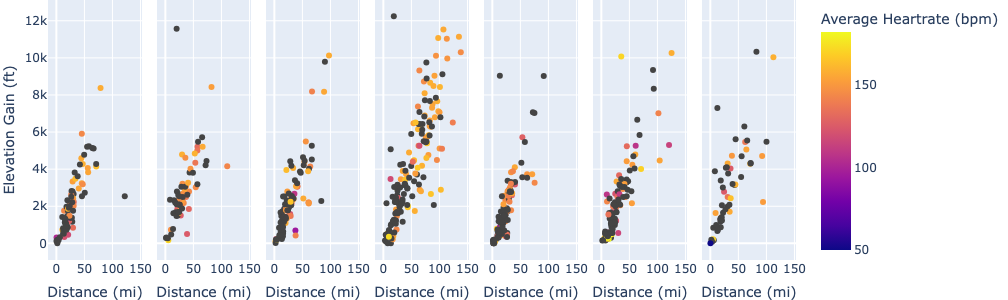

In [200]:
fig = px.scatter(data_frame = df,
                 x = "Distance (mi)",
                 y = "Elevation Gain (ft)",
                 color = "Average Heartrate (bpm)",
                 width = 1000,
                 height = 300,
                facet_col="Days"
                )

#reduce whitespace
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
# show the plot
fig.show()

In [201]:
year = [] 
for date in df['Date']:
    year.append(date[:4])
    
df['Year'] = year


In [204]:
df

,Unnamed: 0,Name,Distance (mi),Moving Time (hr),Elevation Gain (ft),Average Heartrate (bpm),Average Power (w),Date,Days,Year
716,716,Veterans Day weekend --- phone dies and 5 mike...,17.12,1.91,1077.76,NaN,NaN,2016-11-13,Sunday,2016
714,714,Thanksgiving ride,15.79,1.79,1328.74,NaN,NaN,2016-11-24,Thursday,2016
717,717,Dad tried to kill me,17.07,1.74,948.49,NaN,NaN,2016-08-04,Thursday,2016
715,715,Afternoon Ride,10.40,1.05,484.25,NaN,NaN,2016-11-23,Wednesday,2016
697,697,Morning Ride,54.84,4.34,3353.02,NaN,NaN,2017-09-23,Saturday,2017
...,...,...,...,...,...,...,...,...,...,...
79,79,Afternoon Ride,19.83,2.18,2273.62,NaN,NaN,2023-06-28,Wednesday,2023
98,98,Morning Ride,35.66,3.17,4609.58,146.7,NaN,2023-05-10,Wednesday,2023
141,141,Afternoon Ride,66.40,4.07,5203.41,156.6,184.0,2023-02-01,Wednesday,2023
151,151,Morning Run,5.20,0.74,173.88,171.1,NaN,2023-01-18,Wednesday,2023


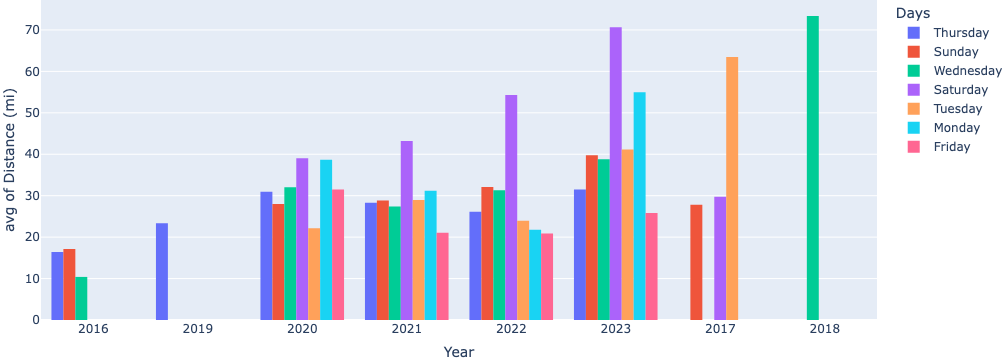

In [207]:
fig = px.histogram(df.sort_values('Date'), x = "Year",y = "Distance (mi)",barmode='group',histfunc='avg',color="Days")

# reduce whitespace
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# show the plot
fig.show()